# Qantitative Analyst Case Study
## Validus

#### Task
Consider a multiperiod binomial asset model for an FX spot rate S with N periods. Under this particular model, we have the following assumptions:

· the initial price of the asset is 𝑆0=1.28065;

· under the risk-neutral measure, the asset price at period j is 𝑆𝑗=(1+𝑣)𝑆𝑗−1 with probability ½, and 𝑆𝑗=(1−𝑣)𝑆𝑗−1 with probability ½, with 0<𝑣<1; and

· domestic and foreign interest rates associated with borrowing/lending a currency for a single time period is 0.

The initial price of the asset is 1.28065

Assumptions

Under the risk neutral meausre, the asseet price at period j is S_j = (1+v) * S_(j-1) and S_j =(1-v) * S_(j-1), each with 0.5 probability. 

Under these asssumption, there is at period j an up and down scenarios which can be denoted as:
u = (1+v)
d = (1-v)
each with 0.5 probability. 

S_j = (S_(j-1) * (u * 0.5)) + (S_(j-1) * (d * 0.5))

# import libraries

In [583]:
%run Functions.ipynb
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import date
from numpy_financial import irr


Defines values

In [581]:
# input
S0 = 1.28065
u = (1+v)
d = (1-v)
p = 0.5

In [584]:
N = 10
v = 0.05

In [524]:
# Calculate the FX spot
S = [S0 * u ** j * d ** (N - j) for j in range(N + 1)]
# Calculate the option value 
option_payoff = [max(K - S[j], 0) for j in range(N + 1)] 

In [592]:
maxS(v = v, N = N)

1.8978197201902203

In [677]:
# Function to simulate GBPUSD FX spot rate paths
def simulate_fx_spot_rate_paths(N, v, num_paths):
    u = 1 + v
    d = 1 - v
    
    # Initialize array to store simulated FX spot rate paths
    fx_spot_rate_paths = np.zeros((num_paths, N+1))
    
    # Simulate FX spot rate paths
    for i in range(num_paths):
        fx_spot_rate = 1.28065  # Initial GBPUSD FX spot rate
        for j in range(N+1):
            fx_spot_rate_paths[i][j] = fx_spot_rate
            fx_spot_rate *= np.random.choice([u, d], p=[0.5, 0.5])
    
    return fx_spot_rate_paths

In [678]:
# Given parameters
N = 10  # Number of periods
v = 0.05  # Price movement factor
num_paths = 6  # Number of simulated paths

# Simulate FX spot rate paths
fx_spot_rate_paths = simulate_fx_spot_rate_paths(N, v,num_paths)

4. Using the GBPUSD FX spot rate paths, derived from the above binomial model for 𝑁=10 (Δτ=0.5 years),𝑣=0.05, convert the GBP cashflows (provided in the cashflow data spreadsheet) into fund currency (USD) and calculate the IRR (internal rate of return) for each of the paths. Plot the distribution of the IRR values.

In [679]:
# load excel sheet with cash flow information
file_name =  'Quantitative_Analyst_Case_Study_2024_Cashflow_Model.xlsx'
df = pd.read_excel(file_name)
df


,Time,Fund,Cashflow Type,Cashflow Amount (in Local Asset Currecny),Local Asset Currency,Fund Currency,Base Case IRR
0,2024-03-31,Validus V,Equity,-100000000,GBP,USD,0.149925
1,2025-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
2,2026-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
3,2027-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
4,2028-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
5,2029-03-31,Validus V,Proceeds,115000000,GBP,USD,NaN


In [680]:
# calculate irr based on different path
results = [df['Base Case IRR'][0]]
df['time'] = df.index

In [681]:
for i in df.index:
    df1 = pd.DataFrame({'path': fx_spot_rate_paths[i],
                        "time": np.arange(0, 5.5, 0.5)})
    
    inner_join_df = pd.merge(df, df1, on='time', how='inner')
    cashflow = inner_join_df['Cashflow Amount (in Local Asset Currecny)']*inner_join_df['path']

    irr_value = irr(cashflow)
    results.append(irr_value)

/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/1094355272.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/1094355272.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/1094355272.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/1094355272.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join

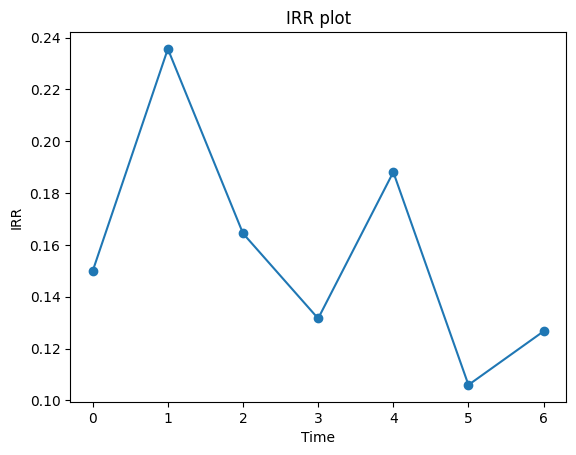

In [682]:
# Plot the values
plt.plot(results, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('IRR')
plt.title('IRR plot')

# Show the plot
plt.show()


Assume we would like to buy a GBPUSD European put option to hedge our FX exposure. If the USD and GBP interest rates are 0% throughout the time horizon of the fund, calculate the option’s fair market value (premium) at trade date (t = 0). See the option details below:

· Trade date: 31/03/2024

· Expiry Date: 31/03/2029

· Notional Amount: 100,000,000 GBP

· Strike 𝐾=𝑆0=1.28065


In [683]:
notional = 100000000
premium = V * notional
print(f'The value of the option in GDP is', round(premium, 2)) 


The value of the option in GDP is 36522993.14


In [667]:
df

,Time,Fund,Cashflow Type,Cashflow Amount (in Local Asset Currecny),Local Asset Currency,Fund Currency,Base Case IRR,time
0,2024-03-31,Validus V,Equity,-100000000,GBP,USD,0.149925,0
1,2025-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,1
2,2026-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,2
3,2027-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,3
4,2028-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,4
5,2029-03-31,Validus V,Proceeds,115000000,GBP,USD,NaN,5


6. Calculate the IRR of the hedged portfolio, including the option premium payment you calculated in (5) and the option payoff. Plot the distribution of the hedged portfolio IRR values.

In [770]:
# Convert the cash flow amounts to USD
df['Cashflow Amount (in USD)'] = df['Cashflow Amount (in Local Asset Currecny)'] * S0

In [772]:
cashflows = df['Cashflow Amount (in USD)'] + premium + option_payoff
irr_value = irr(cashflows)

In [788]:
irr_value

print('The IRR of the hedged portfolio is' , irr_value)

The IRR of the hedged portfolio is 0.3463674162783863


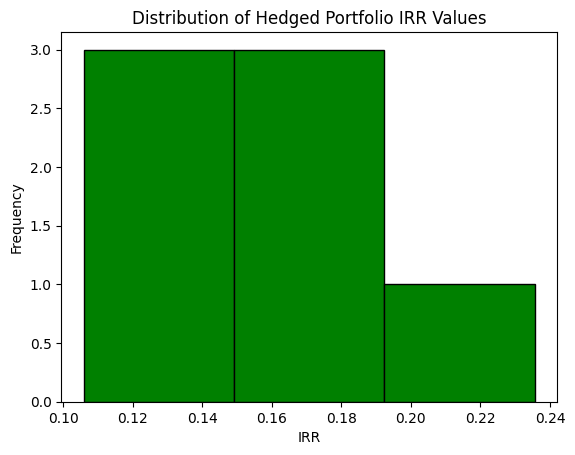

In [789]:
# Plot the distribution of IRR values
plt.hist(results, bins=3, color='green', edgecolor='black')
plt.xlabel('IRR')
plt.ylabel('Frequency')
plt.title('Distribution of Hedged Portfolio IRR Values')
plt.show()